In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import LogNorm
import os
from astropy.io import ascii
cwd = os.getcwd()
os.chdir(cwd + '/..')
from gcex.utils.input_output import cosmic_read_helper, read_in_for_paper
from gcex.utils.input_output import gr_pdot
from gcex.utils.getlcs import get_lcs_test
os.chdir(cwd)
import pickle
import pandas

# Timing

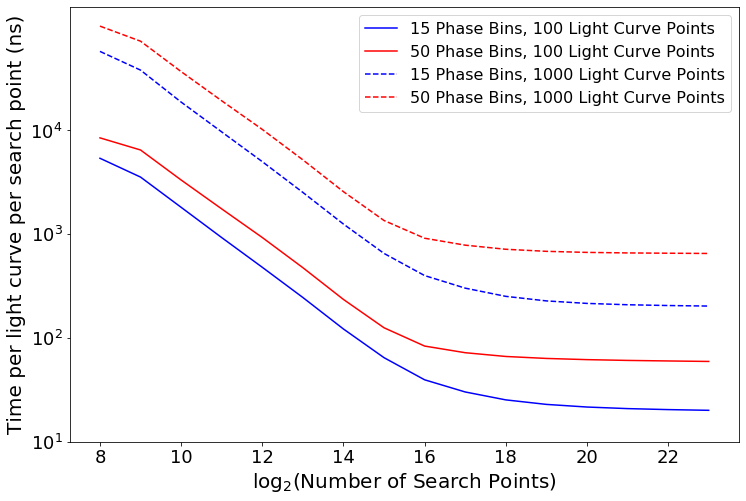

In [44]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.0)
num_pdots = 256

tick_fontsize = 18
label_fontsize = 20

# get data
phase_bin_list = [15, 50]
num_points = [100, 1000]
colors = ['blue', 'red']
lss = ['solid', 'dashed']

for nps, ls in zip(num_points, lss):
    for pb, color in zip(phase_bin_list, colors): 
        num_freqs, total, per = np.load('data/timing_results_{}_{}.npy'.format(pb, nps))
        #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color=color, ls=ls)
        
        #if nps == 100 and pb == 50:
        #    num_freqs, total, per = np.load('data/pdot_check_timing_results_{}_{}.npy'.format(pb, nps))
        #    #ax1.plot(np.log2(num_freqs*num_pdots), np.log10(total))
        #    label = '{} Phase Bins, {} Light Curve Points'.format(pb, nps)
        #    ax1.plot(np.log2(num_freqs*num_pdots), np.log10(per), label=label, color='k', ls=ls)
    
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_fontsize) 
    
time_ticks = [-8, -7, -6, -5]
time_tick_labels = [r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$']
ax1.set_yticks(time_ticks)
ax1.set_yticklabels(time_tick_labels, fontsize=tick_fontsize)
ax1.set_ylabel('Time per light curve per search point (ns)', fontsize=label_fontsize)
ax1.set_xlabel(r"log$_2$(Number of Search Points)", fontsize=label_fontsize)
ax1.legend(loc='upper right', prop={'size':16})
fig.savefig("figures/timing_example.pdf", dpi=200)

# Light Curve Example

In [13]:
input_dict = {
                 'mag': 19.0,
                 'm1': 0.07231938,
                 'm2': 0.7526806,
                 'd': 1100854.05444269,
                 'period': 0.0064763,
                 'Pdot': 4.83708600e-10,
                 'incl': 100.,
                 'sbratio': 0.5
             }


input_dict['q'] = 10.40773013
input_dict['m_tot'] = 0.82499998

input_dict = {key: np.array([input_dict[key]]) for key in input_dict}
lcs = get_lcs_test(input_dict, mag=19.0, min_pts=299, max_pts=301, verbose=25, mean_dt=3, sig_t=2)

# add ad hoc errors
mag = -lcs[0][:, 1]
std = 0.005
lcs[0][:, 1] = np.random.randn(len(mag))*lcs[0][:, 2] + mag

0


<Figure size 432x288 with 0 Axes>

In [48]:
import pickle
with open('../input/light_curves.pickle', 'rb') as f:
    check = pickle.load(f)

for i, binary in enumerate(check.values()):
    print(1./binary.get('params').get('period'), binary.get('t').max(), i)
keys = list(check.keys())

ind = 38
    
binary = check[keys[ind]]

input_dict = binary.get('params')

lcs = [np.array([binary.get('t'), binary.get('true_mag')]).T]


84.47707391478907 881.1686201919807 0
84.47707391478907 941.4941792559209 1
84.47707391478907 988.7455534722069 2
84.47707391478907 930.481237073503 3
84.47707391478907 852.3214890977015 4
84.47707391478907 903.2077402449487 5
84.47707391478907 889.4283329436547 6
84.47707391478907 876.5585732969446 7
84.47707391478907 1002.3427719503312 8
84.47707391478907 923.8774035956862 9
84.47707391478907 873.7865138144859 10
84.47707391478907 921.6795759256921 11
84.47707391478907 880.8785484724655 12
84.47707391478907 948.0210241024006 13
84.47707391478907 925.283233269393 14
84.47707391478907 933.0007367139251 15
84.47707391478907 974.1424136901443 16
84.47707391478907 1015.3639046556626 17
84.47707391478907 890.3128290220162 18
84.47707391478907 1004.9177716422073 19
84.47707391478907 911.212591082979 20
84.47707391478907 853.5162905882707 21
84.47707391478907 922.7160949958851 22
84.47707391478907 1052.8070246257666 23
84.47707391478907 1023.3462699564726 24
84.47707391478907 838.47975412745

[-19.27393022 -18.93352266 -18.8991983  -19.02803485 -18.88135373
 -18.93332289 -18.93400639 -18.89749698 -19.00527364 -19.2476586
 -18.9759072  -18.9596712  -19.02144993 -18.96037401 -18.91741968
 -19.00733451 -18.9136376  -18.99937585 -18.97384814 -19.04151194
 -19.05455858 -18.91655736 -18.91303476 -19.09430992 -18.92472244
 -18.93155451 -18.94652109 -18.97960054 -19.10023097 -18.87298075
 -19.05821908 -19.00497566 -18.9285519  -18.84553224 -19.00928902
 -19.02018466 -19.00916662 -19.09170995 -18.80538806 -18.93989444
 -19.02431491 -18.92537457 -18.8960209  -18.92932998 -19.30557873
 -18.81385372 -18.86396537 -18.97079338 -18.95990499 -18.94718027
 -18.97069396 -19.14118148 -18.96461673 -18.97768952 -18.87623723
 -18.9077246  -18.95000992 -19.06217926 -18.96938723 -18.97372844
 -19.09915842 -19.0316     -19.08645584 -19.14308156 -19.04629058
 -19.0071861  -18.93165511 -18.94242346 -18.92335389 -19.01894581
 -18.81556629 -18.98972375 -18.85557157 -19.01232285 -19.02204145
 -18.981174

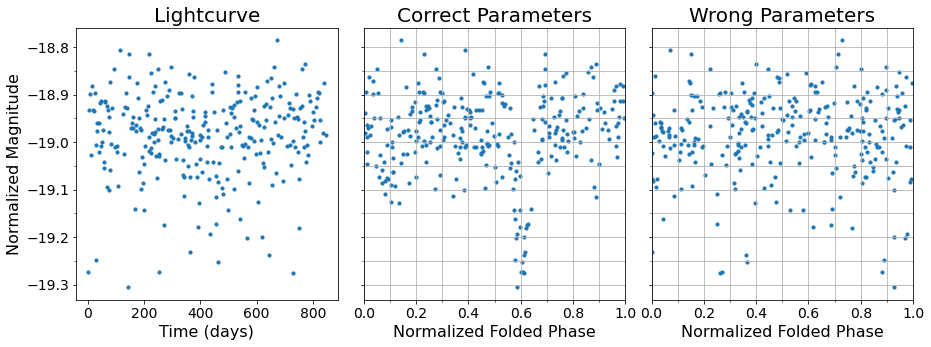

In [46]:
titles = ['Lightcurve', 'Correct Parameters', 'Wrong Parameters']

fig, ax = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(wspace=0.1)
fig.set_size_inches(15.0, 5.0)
ax = ax.ravel()


period = input_dict['period']
frequency = 1./period
pdot = input_dict['Pdot']


wrong_period = np.abs((1+np.random.randn()))*period
wrong_pdot = (1+np.random.randn())*pdot
wrong_frequency = 1/wrong_period

t = lcs[0][:,0] + 0.6*period
mags = -lcs[0][:,1]

fold = np.fmod(t-0.5*pdot*frequency*(t*t), period)*frequency
wrong_fold = np.fmod(t-0.5*wrong_pdot*wrong_frequency*(t*t), wrong_period)*wrong_frequency

print(mags)
ax[0].scatter(t, mags, s=10)
ax[1].scatter(fold, mags, s=10)
ax[2].scatter(wrong_fold, mags, s=10)

limits = (0.7, 1.05)
#ax[0].set_ylim(*limits)

for (ax_i, title) in zip(ax, titles):
    ax_i.set_title(title, fontsize=20)
    ax_i.tick_params('both', labelsize=14)
    
#ax[1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])
for ax_i in ax[1:]:
    ax_i.set_xlim(0.0, 1.0)
    ax_i.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax_i.grid(True, which='both')
    ax_i.set_xlabel('Normalized Folded Phase', fontsize=16)

#ax[0].set_ylim(0.85, 1.05)
ax[0].set_xlabel('Time (days)', fontsize=16)
ax[0].set_ylabel('Normalized Magnitude', fontsize=16)
fig.savefig('figures/light_curve_example.pdf', dpi=200)
print("correct period:", period, "correct pdot:", pdot)
print("wrong period:", wrong_period, "wrong pdot:", wrong_pdot)

# Populations

In [90]:
fp = '../input/gx_save_lambda_var_alpha_025.csv'
params = cosmic_read_helper(fp, x_sun=0.0, y_sun=0.0, z_sun=0.0, use_gr=False)
print(params.keys())

dict_keys(['f_gw[Hz]', 'f_dot_total [yr^(-2)]', 'm1 [msun]', 'm2[msun]', 'xGx[kpc]', 'yGx[kpc]', 'zGx[kpc]', 'm1', 'm2', 'q', 'm_tot', 'd', 'period', 'Pdot', 'incl', 'sbratio'])


In [8]:
params = pandas.read_hdf(fp)

In [33]:
params.keys()
params['porb'].shape

(6587134,)

25421 25421 6587134
3816
3816
3816
3816
3816
37539
37539
37539
37539
37539
35841
35841
35841
35841
35841


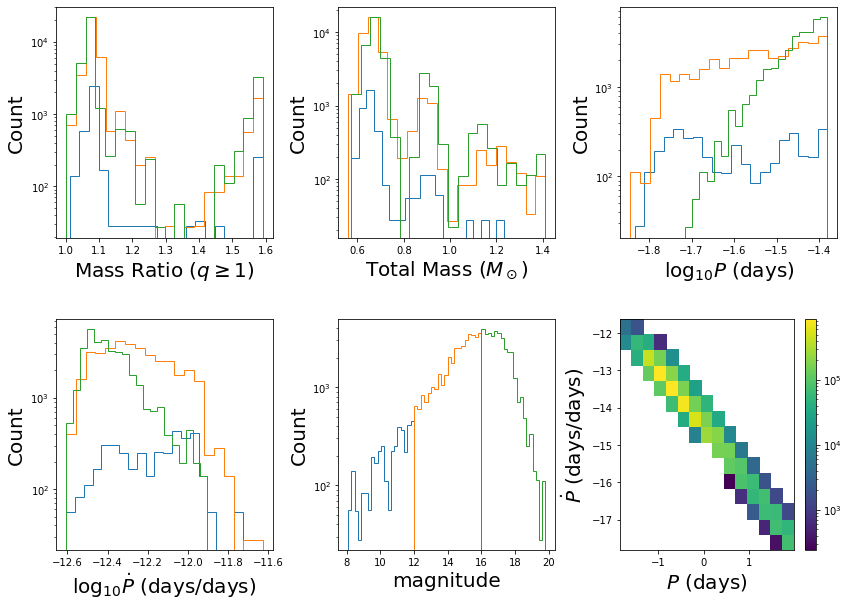

In [39]:
plt.close()

fp = '../new_data_out_file.hdf5'

m1 = params.get('mass_1')
m2 = params.get('mass_2')

print(len(np.unique(m1)), len(np.unique(m2)), len(params.get('porb')))
params['q'] = m1/m2*(m1 >= m2) + m2/m1*(m1 < m2)
params['m_tot'] = m1 + m2
params['period'] =  params.get('porb')
params['Pdot'] = gr_pdot(m1, m2, params.get('porb'))
params['m'] = params.get('m_DWD')
# TODO separate into populations ??
show_keys = ['q', 'm_tot', 'period', 'Pdot', 'm']
labels = [r'Mass Ratio ($q\geq1$)', r'Total Mass ($M_\odot$)', r'log$_{10}P$ (days)', r'log$_{10}\dot{P}$ (days/days)', 'magnitude'] # check parsec
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(hspace=0.35, wspace=0.3, right=0.9)
ax = ax.ravel()
fig.set_size_inches(14,10)

label_fontsize = 20

breaks = [8, 12, 16, 21]
for i in range(len(breaks) - 1):
    up = breaks[i+1]
    down = breaks[i]
    
    #inds = (np.log10(params['period']) > down) & (np.log10(params['period']) < up)
    
    inds = (params['period']<1/24.0) & (params['m'] > down) & (params['m'] < up)
    
    for axis, key, label in zip(ax, show_keys, labels):
        input_val = np.log10(params[key][inds]) if key in ['period'] else params[key][inds]
        if key == 'Pdot':
            input_val = np.log10(-params[key][inds])
        print(len(input_val))
        axis.hist(input_val, bins=20, log=True, histtype='step')
        axis.set_xlabel(label, fontsize=label_fontsize)

for axis in ax[:-1]:
    axis.set_ylabel('Count', fontsize=label_fontsize)
    
h = ax[-1].hist2d(np.log10(params['period']), np.log10(-params['Pdot']), bins=15, norm=LogNorm())
fig.colorbar(h[3])
ax[-1].set_ylabel(r'$\dot{P}$ (days/days)', fontsize=label_fontsize)
ax[-1].set_xlabel(r'$P$ (days)', fontsize=label_fontsize)

fig.savefig('paper/figures/population_parameters.pdf')

## Output Data

In [11]:
from gcex.utils.input_output import read_in_for_paper

In [14]:
with open('check_data_85.pickle', 'rb') as f:
    output_data = pickle.load(f)
    
check = read_in_for_paper('../grid_light_curves_85.pickle', true_mag=True, subtract_median=False)

In [64]:
num = 0
length = []
for c in check[0]:
    inds = np.where(c[:, 1] > 20.5)[0]
    if len(inds) != 0:
        length.append(len(inds))
        #print(inds)
        num+=1
        
        
print(num, np.mean(length))

284 7.834507042253521


In [45]:
sig = []
for recov, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) < 17.5:
        sig.append(recov['sig'])

In [46]:
sig

[-6.5734453,
 -11.142585,
 -15.7234955,
 -8.4412155,
 -11.251048,
 -9.46107,
 -15.246812,
 -20.228666,
 -14.467749,
 -6.810229,
 -12.288816,
 -6.900664,
 -11.852999,
 -19.300266,
 -9.757636,
 -7.88051,
 -17.835196,
 -7.56522,
 -11.148419,
 -9.715846,
 -9.035108,
 -15.766216,
 -8.80074,
 -13.723998,
 -12.757772,
 -11.002804,
 -9.36291,
 -9.956522,
 -12.788002,
 -11.974424,
 -12.951916,
 -8.267894,
 -13.859231,
 -24.615574,
 -19.49162,
 -9.26481,
 -13.487526,
 -7.0767093,
 -9.105957,
 -21.464542,
 -9.750991,
 -6.7422843,
 -21.603012,
 -9.075378,
 -8.711985,
 -11.65016,
 -9.68571,
 -14.476503,
 -8.008001,
 -13.719892,
 -14.70374,
 -9.982428,
 -7.665033,
 -7.787388,
 -7.8631477,
 -9.247876,
 -8.93768,
 -8.245891,
 -7.926223,
 -8.701129,
 -9.746511,
 -10.63827,
 -13.367413,
 -13.3376665,
 -17.35722,
 -9.00528,
 -14.956744,
 -25.2576,
 -18.661705,
 -10.7887945,
 -14.901794,
 -8.407329,
 -10.536569,
 -24.467632,
 -11.738532,
 -7.246457,
 -18.933613,
 -10.884693,
 -7.570527,
 -12.348256,
 -9.3

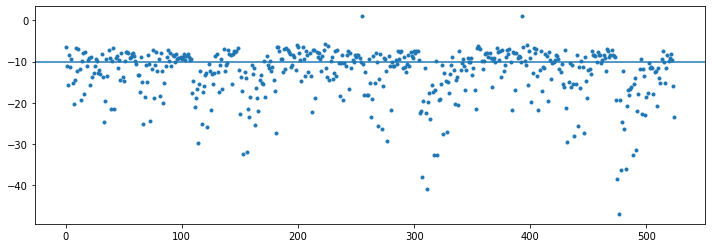

In [47]:
fig = plt.figure()
fig.set_size_inches(12, 4)
plt.plot(sig, '.')
plt.axhline(-10.0)

(-2.5, -1.4)

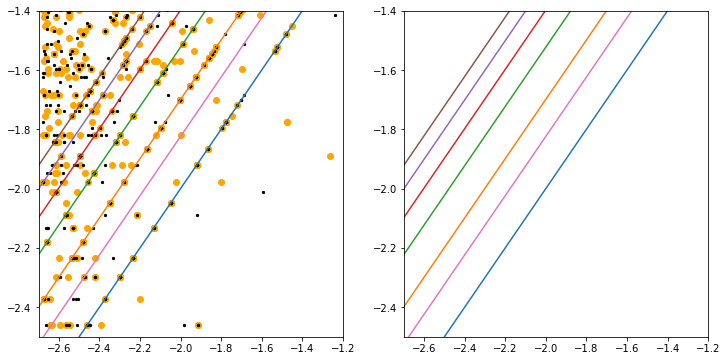

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

true_period = np.asarray([temp['period'] for temp, lc in zip(output_data['truth'], check[0]) if np.mean(lc[:, 1]) < 17.5])
pred_period = []
test_periods = 1/output_data['test_freqs']
for temp, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) < 17.5:
        ind_freq = temp['inds_best'][1][0]
        pred_period.append(test_periods[ind_freq])

pred_period = np.asarray(pred_period)
ax1.scatter(np.log10(pred_period), np.log10(true_period), color='orange')

x = np.linspace(true_period.min()/2.0, true_period.max(), 100)
for i in range(1, 7):
    ax1.plot(np.log10(x), np.log10(x*i))

ax1.plot(np.log10(x), np.log10(x*1.5))
ax1.set_xlim(-2.7, -1.2)
ax1.set_ylim(-2.5, -1.4)


true_period = np.asarray([temp['period'] for temp, lc in zip(output_data['truth'], check[0]) if np.mean(lc[:, 1]) > 17.5])
pred_period = []
test_periods = 1/output_data['test_freqs']
for temp, lc in zip(output_data['res'], check[0]):
    if np.mean(lc[:, 1]) > 17.5:
        ind_freq = temp['inds_best'][1][0]
        pred_period.append(test_periods[ind_freq])

pred_period = np.asarray(pred_period)
ax1.scatter(np.log10(pred_period), np.log10(true_period), s=5, color='k')

x = np.linspace(true_period.min()/2.0, true_period.max(), 100)
for i in range(1, 7):
    ax2.plot(np.log10(x), np.log10(x*i))

ax2.plot(np.log10(x), np.log10(x*1.5))
ax2.set_xlim(-2.7, -1.2)
ax2.set_ylim(-2.5, -1.4)